#MILESTONE 1

##BUSINES BACKGROUND

RevoBank as it's an European bank that provides credit cards to its customers need to increase the usage of RevoBank credit cards in partnership with various merchants which one is RevoShop.

RevoShop is a well-established e-commerce marketplace company. over the past months, Revobank implemented a new promotion involves distributing RevoShop vouchers to all RevoBank customers exlusively for credit card users via email or sms. when users reddem vouchers on eligbile transactions, they recive 15 credit card reward points (1.5 euro). there are no limits on the number of transactions a user can redeem, and RevoBank covers the full cost of the promotion.

after runnign the promotion for 6 months, the card partnership lead at RevoBank wants a better understanding of the spending patterns among RevoShop customers who are RevoBank credit card users. additionally, they seek to find ways to reduce the cost of the promotion.

##Business Requirement / Goal of Analysis

* To find RevoBank customers behavior during the promotion (6 months)
* To find out the behavior of spending patterns among RevoShop customers who use RevoBank credit cards.
* To find ways to reduce promotional costs.



##DATA PREPARATION


###Import Library

In [ ]:
import pandas as pd
import gdown
import shutil
from decorator import dispatch_on
import pandas as pd
import numpy as np
from datetime import datetime, date,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler

###Import Dataset


from : https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view

In [ ]:
potter_url = 'https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]

###Input to data frame

In [ ]:
df = pd.read_csv(potter)
df.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df.tail()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5.0,25.0,4.0,...,E,Y,0.0,24294.0,0.0,30.0,112.0,0.0,0.0,1982-05-14
112633,101059869,5311-DEPARTMENT STORES,EL CORTE INGLES,36.0,45.0,32.5,20.0,4.0,19.0,3.0,...,E,Y,0.0,32009.0,0.0,22.0,100.0,1.0,0.0,1983-12-17


###Check the DATASET

####Info & Missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

Missing value

In [ ]:
df[df['AVG_PROMO_TXN_AMT_L6M'] == -1 ]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
32,100000133,5262-MARKETPLACES,REVOSH MKTPLC,233.3,180.0,-1.0,100.0,4.0,9.0,1.0,...,A,X,0.0,347926.0,0.0,1.0,66.0,1.0,1.0,1985-12-21
82,100000302,5262-MARKETPLACES,REVOSH MKTPLC,250.0,185.6,-1.0,220.0,2.0,44.0,1.0,...,A,X,0.0,0.0,0.0,1.0,124.0,1.0,1.0,1982-02-24
104,100000357,5262-MARKETPLACES,REVOSH MKTPLC,140.0,102.5,-1.0,140.0,2.0,25.0,1.0,...,A,X,0.0,85733.0,67273.0,1.0,106.0,0.0,0.0,1983-08-22
117,100000387,5262-MARKETPLACES,REVOSH MKTPLC,250.0,240.7,-1.0,200.0,2.0,47.0,1.0,...,A,X,0.0,0.0,0.0,1.0,212.0,1.0,0.0,1983-11-21
166,100000591,5262-MARKETPLACES,REVOSH MKTPLC,110.0,79.5,-1.0,110.0,2.0,22.0,1.0,...,A,X,1.0,133906.0,47075.0,1.0,130.0,0.0,0.0,1977-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,101057451,5262-MARKETPLACES,REVOSHOP,160.0,112.1,-1.0,160.0,2.0,15.0,1.0,...,E,X,0.0,15028.0,46247.0,46.0,124.0,1.0,0.0,1983-12-24
112368,101057690,5262-MARKETPLACES,REVOSHOP,225.0,325.0,-1.0,250.0,3.0,11.0,1.0,...,E,X,1.0,27511.0,30431.0,44.0,102.0,0.0,0.0,1981-04-23
112399,101057929,5262-MARKETPLACES,REVOSHOP,150.0,86.7,-1.0,100.0,3.0,13.0,1.0,...,E,X,1.0,33695.0,41835.0,36.0,106.0,1.0,0.0,1977-10-26
112479,101058836,5262-MARKETPLACES,REVOSHOP,100.0,73.3,-1.0,100.0,4.0,25.0,1.0,...,E,X,0.0,28398.0,0.0,26.0,122.0,1.0,1.0,1981-08-25


Issue :

* `BIRTH_DATE` not in **date** data format
* `HOMEOWNER_STATUS` can define by string value (Homeowner / Tenant)
* `FLAG_FEMALE` can define by string value (F / M) & rename to `GENDER`
* `PROMO_CHANNEL` can define by string value (e-mail / SMS)
* `AVG_PROMO_TXN_AMT_L6M` have 3516 missing value

####Unique Values

Check Unique Value of Object for typo

Column : `MCC`,`MERCHANT_NAME`,`CUST_VALUE_GROUP`,`MAPP_ACTIVE_GROUP`



In [ ]:
col = ['MCC','MERCHANT_NAME','CUST_VALUE_GROUP','MAPP_ACTIVE_GROUP']
for x in col:
  print(x)
  print(df[x].value_counts())
  print('\n')

MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64


CUST_VALUE_GROUP
E    46599
C    18482
B    17850
A    17078
D    12625
Name: CUST_VALUE_GROUP, dtype: int64


MAPP_ACTIVE_GROUP
X    104739
Y      7405
Z       490
Name: MAPP_ACTIVE_GROUP, dtype: int64




Issue :

* `MCC` Has 1 merchant category code `5311-DEPARTMENT STORES` that is not required for analysis that we can drop
* `MERCHANT_NAME` has another name of merchant `REVOSH MKTPLC` for REVOSHOP to merge
* `MERCHANT_NAME` has another name of merchant (`TOKTOKLIVE`,`EL CORTE INGLES`) that we don't need for the analysis that we can drop



####Duplicated Values

Check Duplicated of `ACCOUNT_ID`

In [ ]:
df[df['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
1836,100017966,5262-MARKETPLACES,REVOSH MKTPLC,150.0,78.8,150.0,100.0,3.0,17.0,2.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1890,100018465,5262-MARKETPLACES,TOKTOKLIVE,88.0,78.9,86.7,100.0,4.0,17.0,2.0,...,B,X,1.0,64423.0,47589.0,20.0,102.0,1.0,1.0,1972-10-15
3080,100033332,5262-MARKETPLACES,REVOSH MKTPLC,122.5,245.6,50.0,160.0,4.0,21.0,1.0,...,B,X,1.0,227497.0,0.0,24.0,127.0,0.0,1.0,1983-04-21
3653,100038831,5262-MARKETPLACES,TOKTOKLIVE,150.0,206.4,150.0,200.0,2.0,11.0,2.0,...,A,X,1.0,102884.0,72887.0,25.0,105.0,0.0,0.0,1986-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110711,101044177,5262-MARKETPLACES,TOKTOKLIVE,100.0,85.2,100.0,100.0,4.0,22.0,3.0,...,D,X,1.0,68891.0,57264.0,39.0,127.0,0.0,0.0,1987-02-26
110833,101045135,5262-MARKETPLACES,REVOSHOP,100.0,104.3,100.0,100.0,2.0,13.0,2.0,...,D,X,0.0,71314.0,0.0,31.0,51.0,0.0,1.0,1990-02-19
110857,101045627,5262-MARKETPLACES,REVOSHOP,57.3,56.2,50.0,50.0,11.0,34.0,4.0,...,E,X,1.0,53316.0,39696.0,38.0,91.0,0.0,0.0,1987-07-23
110878,101045690,5262-MARKETPLACES,TOKTOKLIVE,106.7,98.8,100.0,130.0,2.0,23.0,1.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18


Issue :

*There's have 201 duplicates rows in `ACCOUNT_ID`

####Summary Of issue :

* `BIRTH_DATE` not in **date** data format
* `HOMEOWNER_STATUS` can define by string value (Homeowner / Tenant)
* `FLAG_FEMALE` can define by string value (F / M)
* `AVG_PROMO_TXN_AMT_L6M` have 3516 missing value
* Rename `FLAG_FEMALE` to GENDER
* `PROMO_CHANNEL` can define by string value (e-mail / SMS)
* `MERCHANT_NAME` has another name of merchant `REVOSH MKTPLC` for REVOSHOP to merge
* `MERCHANT_NAME` has another name of merchant (`TOKTOKLIVE`,`EL CORTE INGLES`) that we don't need for the analysis that we can drop
* `MCC` Has 1 merchant category code `5311-DEPARTMENT STORES` that is not required for analysis that we can drop
* There's have 201 duplicates in `ACCOUNT_ID`

###DATA CLEANING

Create Backup data

In [ ]:
df_dc = df.copy()
df_dc.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


####Change Data Format

* `BIRTH_DATE` not in date data format


In [ ]:
df_dc['BIRTH_DATE'] = pd.to_datetime(df_dc['BIRTH_DATE'])

# df_dc[['HOMEOWNER_STATUS','FLAG_FEMALE','PROMO_CHANNEL']] = df_dc[['HOMEOWNER_STATUS','FLAG_FEMALE','PROMO_CHANNEL']].astype(int)
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             112634 non-null  int64         
 1   MCC                    112634 non-null  object        
 2   MERCHANT_NAME          112634 non-null  object        
 3   AVG_TXN_AMT_L6M        112634 non-null  float64       
 4   AVG_TXN_AMT_LTM        112634 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64       
 7   TXN_CNT_L6M            112634 non-null  float64       
 8   TXN_CNT_LTM            112634 non-null  float64       
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64       
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64       
 11  LAST_TXN_DAY           112634 non-null  float64       
 12  CNT_PROMO_L6M          112634 non-null  floa

####Redivine Value

* `HOMEOWNER_STATUS` can define by string value (Homeowner / Tenant)
* `FLAG_FEMALE` can define by string value (F / M) & rename to `GENDER`
* `PROMO_CHANNEL` can define by string value (e-mail / SMS)
* `AVG_PROMO_TXN_AMT_L6M` have 3516 missing value

In [ ]:
df_dc['HOMEOWNER_STATUS'].replace([1, 0], ['HOMEOWNER','TENANT'] , inplace = True)
df_dc.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,TENANT,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,TENANT,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,TENANT,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,TENANT,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,TENANT,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df_dc['FLAG_FEMALE'].replace([1, 0], ['F','M'] , inplace = True)
df_dc.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,TENANT,90587.0,59785.0,32.0,123.0,F,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,TENANT,65814.0,32597.0,34.0,109.0,F,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,TENANT,42583.0,0.0,1.0,89.0,M,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,TENANT,61176.0,0.0,0.0,86.0,F,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,TENANT,44525.0,42253.0,22.0,124.0,F,0.0,1989-10-21


* Rename `FLAG_FEMALE` to GENDER

In [ ]:
df_dc.rename(columns={"FLAG_FEMALE": "GENDER"}, inplace = True)
df_dc.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,TENANT,90587.0,59785.0,32.0,123.0,F,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,TENANT,65814.0,32597.0,34.0,109.0,F,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,TENANT,42583.0,0.0,1.0,89.0,M,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,TENANT,61176.0,0.0,0.0,86.0,F,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,TENANT,44525.0,42253.0,22.0,124.0,F,0.0,1989-10-21


In [ ]:
df_dc['PROMO_CHANNEL'].replace([1, 0], ['email','sms'] , inplace = True)
df_dc.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,TENANT,90587.0,59785.0,32.0,123.0,F,sms,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,TENANT,65814.0,32597.0,34.0,109.0,F,sms,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,TENANT,42583.0,0.0,1.0,89.0,M,sms,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,TENANT,61176.0,0.0,0.0,86.0,F,email,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,TENANT,44525.0,42253.0,22.0,124.0,F,sms,1989-10-21


* Delete Missing Value

In [ ]:
# df_dc['AVG_PROMO_TXN_AMT_L6M'].replace(-1, 0, inplace = True)
df_dc = df_dc[df_dc['AVG_PROMO_TXN_AMT_L6M'] != -1 ]
df_dc

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,TENANT,90587.0,59785.0,32.0,123.0,F,sms,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,TENANT,65814.0,32597.0,34.0,109.0,F,sms,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,TENANT,42583.0,0.0,1.0,89.0,M,sms,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,TENANT,61176.0,0.0,0.0,86.0,F,email,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,TENANT,44525.0,42253.0,22.0,124.0,F,sms,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,TENANT,27087.0,35533.0,33.0,68.0,M,sms,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,TENANT,26302.0,0.0,27.0,125.0,M,email,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,HOMEOWNER,70105.0,41249.0,63.0,116.0,F,sms,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5.0,25.0,4.0,...,E,Y,TENANT,24294.0,0.0,30.0,112.0,M,sms,1982-05-14


In [ ]:
df_dc[df_dc['AVG_PROMO_TXN_AMT_L6M'] == -1 ]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE


####Fixed typo

* `MERCHANT_NAME` has another name of merchant `REVOSH MKTPLC` for REVOSHOP to merge

In [ ]:
df_dc.replace('REVOSH MKTPLC','REVOSHOP', inplace = True)
df_dc[df_dc['MERCHANT_NAME'] == 'REVOSH MKTPLC']

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE


Check

In [ ]:
print(df_dc['MERCHANT_NAME'].value_counts())

REVOSHOP           107658
TOKTOKLIVE           1459
EL CORTE INGLES         1
Name: MERCHANT_NAME, dtype: int64


####Drop unnecessary & Duplicateds Columns/Rows

* `MERCHANT_NAME` has another name of merchant (`TOKTOKLIVE`,`EL CORTE INGLES`) that we don't need for the analysis that we can drop

In [ ]:
df_dc = df_dc[df_dc['MERCHANT_NAME'] != 'TOKTOKLIVE']
df_dc = df_dc[df_dc['MERCHANT_NAME'] != 'EL CORTE INGLES']

In [ ]:
print(df_dc['MERCHANT_NAME'].value_counts())

REVOSHOP    107658
Name: MERCHANT_NAME, dtype: int64


* `MCC` Has 1 merchant category code `5311-DEPARTMENT STORES` that is not required for analysis that we can drop

In [ ]:
df_dc = df_dc[df_dc['MCC'] != '5311-DEPARTMENT STORES']

In [ ]:
print(df_dc['MCC'].value_counts())

5262-MARKETPLACES    107658
Name: MCC, dtype: int64


In [ ]:
df_dc.drop_duplicates(subset=['ACCOUNT_ID'], inplace = True)

In [ ]:
df_dc[df_dc['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE


####Cleaned Dateset

In [ ]:
df_dc.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,TENANT,90587.0,59785.0,32.0,123.0,F,sms,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,TENANT,65814.0,32597.0,34.0,109.0,F,sms,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,TENANT,42583.0,0.0,1.0,89.0,M,sms,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,TENANT,61176.0,0.0,0.0,86.0,F,email,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,TENANT,44525.0,42253.0,22.0,124.0,F,sms,1989-10-21


In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  int64         
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  float64       
 12  CNT_PROMO_L6M          107658 non-null  floa

* Create Column Sensitivity Customers

In [ ]:
df_dc['promo_percentage'] = df_dc['PROMO_TXN_CNT_L6M'] / df_dc['TXN_CNT_L6M'] * 100
df_dc['promo_sensitive'] = np.where(df_dc['promo_percentage'] >= 50, 'Sensitive', 'Not-Sensitive')
df_dc.drop('promo_percentage', axis=1, inplace=True)

df_dc.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE,promo_sensitive
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,X,TENANT,90587.0,59785.0,32.0,123.0,F,sms,1975-12-17,Not-Sensitive
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,X,TENANT,65814.0,32597.0,34.0,109.0,F,sms,1991-12-27,Sensitive
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,X,TENANT,42583.0,0.0,1.0,89.0,M,sms,1970-03-22,Sensitive
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,X,TENANT,61176.0,0.0,0.0,86.0,F,email,1983-11-26,Sensitive
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,X,TENANT,44525.0,42253.0,22.0,124.0,F,sms,1989-10-21,Sensitive


In [ ]:
df_dc['promo_sensitive'].count()

107658

In [ ]:
df_dc['TOTAL_AMT_LTM'] = df_dc['AVG_TXN_AMT_LTM'] * df_dc['TXN_CNT_LTM']
df_dc['TOTAL_AMT_CS_PROMO_LTM'] = df_dc['AVG_PROMO_TXN_AMT_LTM'] * df_dc['PROMO_TXN_CNT_LTM']

df_dc['TOTAL_AMT_L6M'] = df_dc['AVG_TXN_AMT_L6M'] * df_dc['TXN_CNT_L6M']
df_dc['TOTAL_AMT_CS_PROMO_L6M'] = df_dc['AVG_PROMO_TXN_AMT_L6M'] * df_dc['PROMO_TXN_CNT_L6M']


display(df_dc[['AVG_TXN_AMT_LTM','TXN_CNT_LTM','TOTAL_AMT_LTM']].head())
display(df_dc[['AVG_PROMO_TXN_AMT_LTM','PROMO_TXN_CNT_LTM','TOTAL_AMT_CS_PROMO_LTM']].head())
display(df_dc[['AVG_TXN_AMT_L6M','TXN_CNT_L6M','TOTAL_AMT_L6M']].head())
display(df_dc[['AVG_PROMO_TXN_AMT_L6M','PROMO_TXN_CNT_L6M','TOTAL_AMT_CS_PROMO_L6M']].head())

,AVG_TXN_AMT_LTM,TXN_CNT_LTM,TOTAL_AMT_LTM
0,201.0,21.0,4221.0
1,114.1,22.0,2510.2
2,242.7,12.0,2912.4
3,210.0,27.0,5670.0
4,77.5,44.0,3410.0


,AVG_PROMO_TXN_AMT_LTM,PROMO_TXN_CNT_LTM,TOTAL_AMT_CS_PROMO_LTM
0,250.0,7.0,1750.0
1,150.0,10.0,1500.0
2,290.0,4.0,1160.0
3,300.0,13.0,3900.0
4,90.0,21.0,1890.0


,AVG_TXN_AMT_L6M,TXN_CNT_L6M,TOTAL_AMT_L6M
0,216.0,5.0,1080.0
1,143.3,3.0,429.9
2,263.3,4.0,1053.2
3,235.6,8.0,1884.8
4,98.0,5.0,490.0


,AVG_PROMO_TXN_AMT_L6M,PROMO_TXN_CNT_L6M,TOTAL_AMT_CS_PROMO_L6M
0,200.0,2.0,400.0
1,140.0,2.0,280.0
2,400.0,2.0,800.0
3,242.9,6.0,1457.4
4,97.5,4.0,390.0


##EDA

###Create a new variabel data for EDA

In [ ]:
df_eda = df_dc.copy()
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE,promo_sensitive,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,32.0,123.0,F,sms,1975-12-17,Not-Sensitive,4221.0,1750.0,1080.0,400.0
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,34.0,109.0,F,sms,1991-12-27,Sensitive,2510.2,1500.0,429.9,280.0
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1.0,89.0,M,sms,1970-03-22,Sensitive,2912.4,1160.0,1053.2,800.0
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,0.0,86.0,F,email,1983-11-26,Sensitive,5670.0,3900.0,1884.8,1457.4
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,22.0,124.0,F,sms,1989-10-21,Sensitive,3410.0,1890.0,490.0,390.0


#####Set index to `ACCOUNT_ID` to facilitate analysis

In [ ]:
# df_eda.set_index('ACCOUNT_ID')
df_eda.reset_index
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,PCT_INCOME_RETIREMENT,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE,promo_sensitive,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,32.0,123.0,F,sms,1975-12-17,Not-Sensitive,4221.0,1750.0,1080.0,400.0
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,34.0,109.0,F,sms,1991-12-27,Sensitive,2510.2,1500.0,429.9,280.0
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1.0,89.0,M,sms,1970-03-22,Sensitive,2912.4,1160.0,1053.2,800.0
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,0.0,86.0,F,email,1983-11-26,Sensitive,5670.0,3900.0,1884.8,1457.4
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,22.0,124.0,F,sms,1989-10-21,Sensitive,3410.0,1890.0,490.0,390.0


###Do Descriptive Statistics :
* a. how many RevoShop customers do we have in the data?
* b. What are the costumer demographics in the dataset?
* c. how much total sales have been generated in revoshop pver the past 6 months?
* d. how many sales were made in response to the promo in the last 6 monthhs?
* e. what percentage of total sales at RevoShop is attributed to the promo?
* f. what is the average number of transactions per customer in their lifetime and over the past 6 months?
* g. what is the total cost of the promotion over the past 6 months?
* h. what is the total revenue generated by the promo in the past 6 months?
* i. how many customers are considered promo-sensitive?


---







####a. how many RevoShop customers do we have in the data?

In [ ]:
df_eda['ACCOUNT_ID'].count()

107658

#####RevoShop customers
We have `107658` RevoShop customers

---



####b. What are the costumer demographics in the dataset?

#####Customers by Gender

In [ ]:
df_gender = pd.DataFrame(df_eda['GENDER'].value_counts())
df_gender

,GENDER
F,63035
M,44623


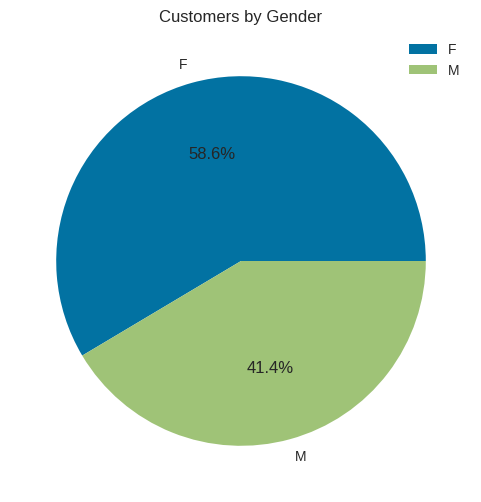

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(df_gender['GENDER'], labels=df_gender.index, autopct='%1.1f%%')
ax.set_title('Customers by Gender')
ax.legend()
fig.show()

* Most of the customers are dominated by Female Customers

Create Column `AGE`

In [ ]:
def age(born):
    today = pd.to_datetime("2023-01-31")
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_eda['AGE'] = df_eda['BIRTH_DATE'].apply(age)
display(df_eda.head())

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MOB,GENDER,PROMO_CHANNEL,BIRTH_DATE,promo_sensitive,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,123.0,F,sms,1975-12-17,Not-Sensitive,4221.0,1750.0,1080.0,400.0,47
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,109.0,F,sms,1991-12-27,Sensitive,2510.2,1500.0,429.9,280.0,31
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,89.0,M,sms,1970-03-22,Sensitive,2912.4,1160.0,1053.2,800.0,52
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,86.0,F,email,1983-11-26,Sensitive,5670.0,3900.0,1884.8,1457.4,39
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,124.0,F,sms,1989-10-21,Sensitive,3410.0,1890.0,490.0,390.0,33




---


#####Age Group

* Create `AGE_GROUP`

In [ ]:
max_age = df_eda['AGE'].max()
print(max_age)
min_age = df_eda['AGE'].min()
print(min_age)

65
17


Create `AGE_GROUP` by : 17-25, 25-35, 35-45, 45-55,>55

In [ ]:
df_eda['AGE_GROUP'] = pd.cut(df_eda['AGE'], [min_age, 25, 35, 45, 55, max_age])
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,GENDER,PROMO_CHANNEL,BIRTH_DATE,promo_sensitive,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,F,sms,1975-12-17,Not-Sensitive,4221.0,1750.0,1080.0,400.0,47,"(45, 55]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,F,sms,1991-12-27,Sensitive,2510.2,1500.0,429.9,280.0,31,"(25, 35]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,M,sms,1970-03-22,Sensitive,2912.4,1160.0,1053.2,800.0,52,"(45, 55]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,F,email,1983-11-26,Sensitive,5670.0,3900.0,1884.8,1457.4,39,"(35, 45]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,F,sms,1989-10-21,Sensitive,3410.0,1890.0,490.0,390.0,33,"(25, 35]"


In [ ]:
df_eda['AGE_GROUP'].value_counts().sort_index()

(17, 25]      419
(25, 35]    22927
(35, 45]    66659
(45, 55]    17193
(55, 65]      459
Name: AGE_GROUP, dtype: int64

In [ ]:
df_age_of_group = pd.DataFrame(df_eda['AGE_GROUP'].value_counts().sort_index())
df_age_of_group.index = df_age_of_group.index.astype(str)
df_age_of_group

,AGE_GROUP
"(17, 25]",419
"(25, 35]",22927
"(35, 45]",66659
"(45, 55]",17193
"(55, 65]",459


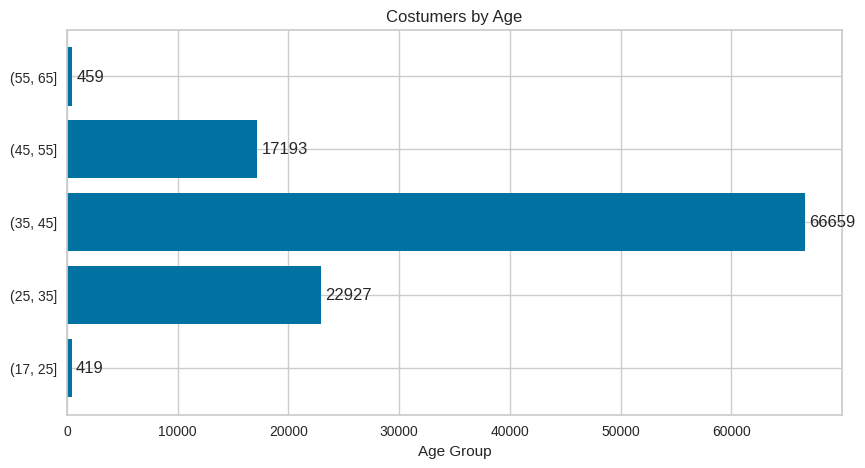

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.barh(df_age_of_group.index, df_age_of_group['AGE_GROUP'])
ax.bar_label(ax1, padding=3)
ax.set_title('Costumers by Age')
ax.set_xlabel('Age Group')

fig.show()

`AGE_GROUP` dominated by group 35 - 45

In [ ]:
df_eda['AGE'].mean()

39.97488342714893



---

##### MOB Distribution Customers

In [ ]:
max_mob = df_eda['MOB'].max()
print(max_mob)
min_mob = df_eda['MOB'].min()
print(min_mob)

570.0
21.0


In [ ]:
# sns.histplot(df_eda["MOB"], bins = 20)

In [ ]:
# df_eda.drop('MOB_GROUP', axis=1, inplace=True)

In [ ]:
df_eda['MOB_GROUP'] = pd.cut(df_eda['MOB'], [0, 60, 90, 120, 150,  float('inf')])
df_eda['MOB_GROUP'] = df_eda['MOB_GROUP'].map(lambda x: '>150)' if x.right == float('inf') else ('<60]' if x.left == 0 else x))
# df_eda['MOB_GROUP'] = df_eda['MOB_GROUP'].map(lambda x: '[<60]' if x.left == 60.0 else x)
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,PROMO_CHANNEL,BIRTH_DATE,promo_sensitive,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,sms,1975-12-17,Not-Sensitive,4221.0,1750.0,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,sms,1991-12-27,Sensitive,2510.2,1500.0,429.9,280.0,31,"(25, 35]","(90.0, 120.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,sms,1970-03-22,Sensitive,2912.4,1160.0,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,email,1983-11-26,Sensitive,5670.0,3900.0,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,sms,1989-10-21,Sensitive,3410.0,1890.0,490.0,390.0,33,"(25, 35]","(120.0, 150.0]"


In [ ]:
df_eda['MOB_GROUP'].value_counts().sort_index()

<60]               7940
(60.0, 90.0]      29669
(90.0, 120.0]     32307
(120.0, 150.0]    37440
>150)               302
Name: MOB_GROUP, dtype: int64

In [ ]:
df_mob_group = pd.DataFrame(df_eda['MOB_GROUP'].value_counts().sort_index())
df_mob_group.index = df_mob_group.index.astype(str)
df_mob_group

,MOB_GROUP
<60],7940
"(60.0, 90.0]",29669
"(90.0, 120.0]",32307
"(120.0, 150.0]",37440
>150),302


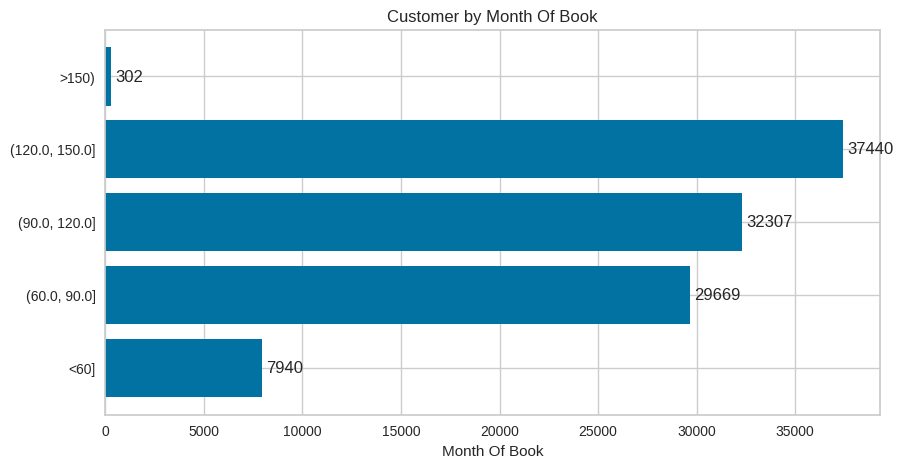

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.barh(df_mob_group.index, df_mob_group['MOB_GROUP'])
ax.bar_label(ax1, padding=3)
ax.set_title('Customer by Month Of Book')
ax.set_xlabel('Month Of Book')

fig.show()

---
#####Home Value Group

Create `HOME_VALUE_GROUP`

In [ ]:
max_val = df_eda['HOME_VALUE'].max()
print(max_val)
min_val = df_eda['HOME_VALUE'].min()
print(min_val)

600050.0
0.0


In [ ]:
# df_eda.drop('HOME_VALUE_GROUP', axis=1, inplace=True)

In [ ]:
df_eda['HOME_VALUE_GROUP'] = pd.cut(df_eda['HOME_VALUE'], [min_val, 50000, 100000, 150000, 200000, 250000, float('inf')])
df_eda['HOME_VALUE_GROUP'] = df_eda['HOME_VALUE_GROUP'].map(lambda x: '>250000)' if x.right == float('inf') else x)
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,BIRTH_DATE,promo_sensitive,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP,HOME_VALUE_GROUP
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1975-12-17,Not-Sensitive,4221.0,1750.0,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]","(50000.0, 100000.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,1991-12-27,Sensitive,2510.2,1500.0,429.9,280.0,31,"(25, 35]","(90.0, 120.0]","(50000.0, 100000.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1970-03-22,Sensitive,2912.4,1160.0,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]","(0.0, 50000.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1983-11-26,Sensitive,5670.0,3900.0,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]","(50000.0, 100000.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,1989-10-21,Sensitive,3410.0,1890.0,490.0,390.0,33,"(25, 35]","(120.0, 150.0]","(0.0, 50000.0]"


In [ ]:
df_eda['HOME_VALUE_GROUP'].value_counts().sort_index()

(0.0, 50000.0]          29664
(50000.0, 100000.0]     50720
(100000.0, 150000.0]    12691
(150000.0, 200000.0]     5854
(200000.0, 250000.0]     3162
>250000)                 4430
Name: HOME_VALUE_GROUP, dtype: int64

In [ ]:
df_home_group = pd.DataFrame(df_eda['HOME_VALUE_GROUP'].value_counts().sort_index())
df_home_group.index = df_home_group.index.astype(str)
df_home_group

,HOME_VALUE_GROUP
"(0.0, 50000.0]",29664
"(50000.0, 100000.0]",50720
"(100000.0, 150000.0]",12691
"(150000.0, 200000.0]",5854
"(200000.0, 250000.0]",3162
>250000),4430


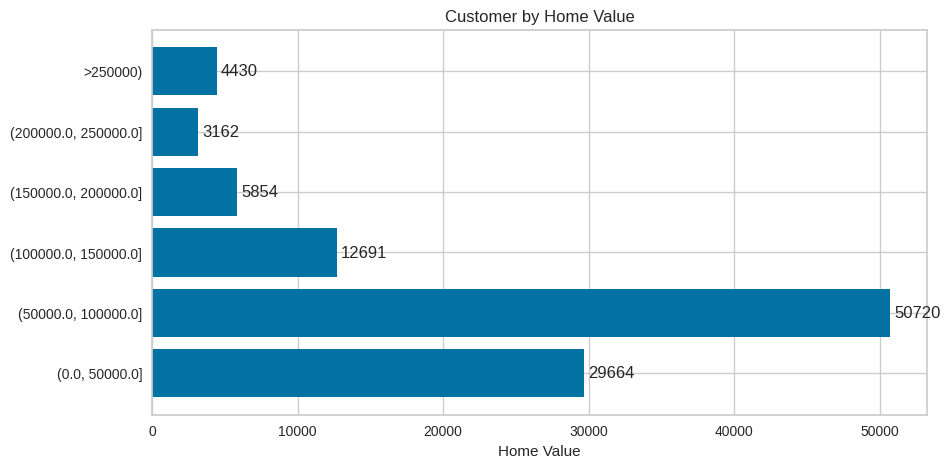

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.barh(df_home_group.index, df_home_group['HOME_VALUE_GROUP'])
ax.bar_label(ax1, padding=3)
ax.set_title('Customer by Home Value')
ax.set_xlabel('Home Value')

fig.show()

---
#####Proxy Income Group

Create `PROXY_INCOME_GROUP`

In [ ]:
max_inc = df_eda['PROXY_INCOME'].max()
print(max_inc)
min_inc = df_eda['PROXY_INCOME'].min()
print(min_inc)

200003.0
0.0


In [ ]:
# df_eda.drop('PROXY_INCOME_GROUP', axis=1, inplace=True)

In [ ]:
df_eda['PROXY_INCOME_GROUP'] = pd.cut(df_eda['PROXY_INCOME'], [0, 20000, 40000, 60000, 80000,  float('inf')], right = False)
df_eda['PROXY_INCOME_GROUP'] = df_eda['PROXY_INCOME_GROUP'].map(lambda x: '>80000)' if x.right == float('inf') else x)
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,promo_sensitive,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP,HOME_VALUE_GROUP,PROXY_INCOME_GROUP
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,Not-Sensitive,4221.0,1750.0,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]","(50000.0, 100000.0]","[40000.0, 60000.0)"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,Sensitive,2510.2,1500.0,429.9,280.0,31,"(25, 35]","(90.0, 120.0]","(50000.0, 100000.0]","[20000.0, 40000.0)"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,Sensitive,2912.4,1160.0,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]","(0.0, 50000.0]","[0.0, 20000.0)"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,Sensitive,5670.0,3900.0,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]","(50000.0, 100000.0]","[0.0, 20000.0)"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,Sensitive,3410.0,1890.0,490.0,390.0,33,"(25, 35]","(120.0, 150.0]","(0.0, 50000.0]","[40000.0, 60000.0)"


In [ ]:
df_eda['PROXY_INCOME_GROUP'].value_counts().sort_index()

[0.0, 20000.0)        26415
[20000.0, 40000.0)    21359
[40000.0, 60000.0)    41726
[60000.0, 80000.0)    13906
>80000)                4252
Name: PROXY_INCOME_GROUP, dtype: int64

In [ ]:
df_proxy_income = pd.DataFrame(df_eda['PROXY_INCOME_GROUP'].value_counts().sort_index())
df_proxy_income.index = df_proxy_income.index.astype(str)
df_proxy_income

,PROXY_INCOME_GROUP
"[0.0, 20000.0)",26415
"[20000.0, 40000.0)",21359
"[40000.0, 60000.0)",41726
"[60000.0, 80000.0)",13906
>80000),4252


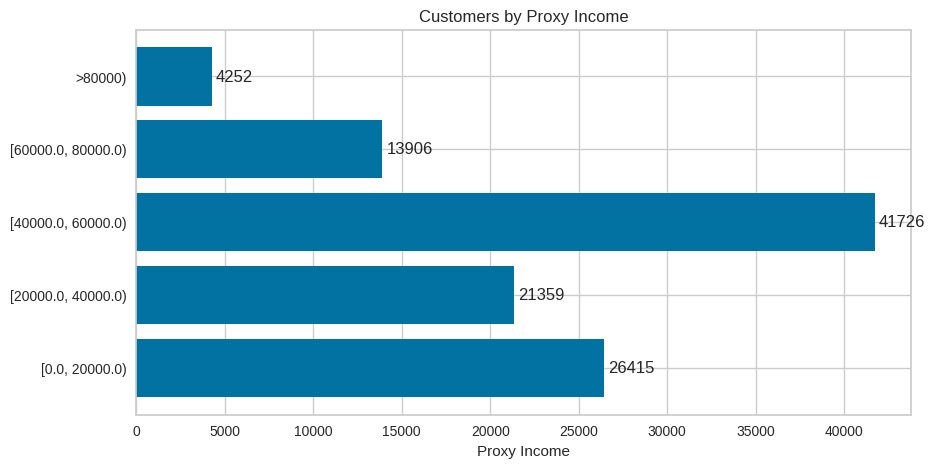

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.barh(df_proxy_income.index, df_proxy_income['PROXY_INCOME_GROUP'])
ax.bar_label(ax1, padding=3)
ax.set_title('Customers by Proxy Income')
ax.set_xlabel('Proxy Income')

fig.show()

#####Income Retirement Group

Create `PCT_INCOME_RETIREMENT`

In [ ]:
max_pct = df_eda['PCT_INCOME_RETIREMENT'].max()
print(max_pct)
min_pct = df_eda['PCT_INCOME_RETIREMENT'].min()
print(min_pct)

100.0
0.0


In [ ]:
df_eda['PCT_INC_RT_GROUP'] = pd.cut(df_eda['PCT_INCOME_RETIREMENT'], [min_pct, 20, 40, 60, 80, max_pct], right = False)
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP,HOME_VALUE_GROUP,PROXY_INCOME_GROUP,PCT_INC_RT_GROUP
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,4221.0,1750.0,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]","(50000.0, 100000.0]","[40000.0, 60000.0)","[20.0, 40.0)"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,2510.2,1500.0,429.9,280.0,31,"(25, 35]","(90.0, 120.0]","(50000.0, 100000.0]","[20000.0, 40000.0)","[20.0, 40.0)"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,2912.4,1160.0,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]","(0.0, 50000.0]","[0.0, 20000.0)","[0.0, 20.0)"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,5670.0,3900.0,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]","(50000.0, 100000.0]","[0.0, 20000.0)","[0.0, 20.0)"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,3410.0,1890.0,490.0,390.0,33,"(25, 35]","(120.0, 150.0]","(0.0, 50000.0]","[40000.0, 60000.0)","[20.0, 40.0)"


In [ ]:
df_eda['PCT_INC_RT_GROUP'].value_counts().sort_index()

[0.0, 20.0)      13584
[20.0, 40.0)     72197
[40.0, 60.0)     20665
[60.0, 80.0)      1178
[80.0, 100.0)       31
Name: PCT_INC_RT_GROUP, dtype: int64

In [ ]:
df_pct_inc_rt_group = pd.DataFrame(df_eda['PCT_INC_RT_GROUP'].value_counts().sort_index())
df_pct_inc_rt_group.index = df_pct_inc_rt_group.index.astype(str)
df_pct_inc_rt_group

,PCT_INC_RT_GROUP
"[0.0, 20.0)",13584
"[20.0, 40.0)",72197
"[40.0, 60.0)",20665
"[60.0, 80.0)",1178
"[80.0, 100.0)",31


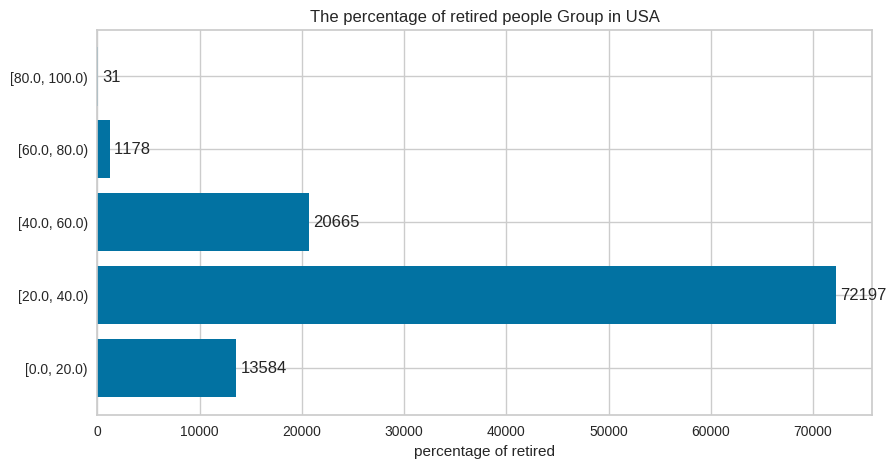

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.barh(df_pct_inc_rt_group.index, df_pct_inc_rt_group['PCT_INC_RT_GROUP'])
ax.bar_label(ax1, padding=3)
ax.set_title('The percentage of retired people Group in USA')
ax.set_xlabel('percentage of retired')

fig.show()



---



In [ ]:
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP,HOME_VALUE_GROUP,PROXY_INCOME_GROUP,PCT_INC_RT_GROUP
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,4221.0,1750.0,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]","(50000.0, 100000.0]","[40000.0, 60000.0)","[20.0, 40.0)"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,2510.2,1500.0,429.9,280.0,31,"(25, 35]","(90.0, 120.0]","(50000.0, 100000.0]","[20000.0, 40000.0)","[20.0, 40.0)"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,2912.4,1160.0,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]","(0.0, 50000.0]","[0.0, 20000.0)","[0.0, 20.0)"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,5670.0,3900.0,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]","(50000.0, 100000.0]","[0.0, 20000.0)","[0.0, 20.0)"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,3410.0,1890.0,490.0,390.0,33,"(25, 35]","(120.0, 150.0]","(0.0, 50000.0]","[40000.0, 60000.0)","[20.0, 40.0)"


#####Agregat

In [ ]:
df_eda['AGE'].groupby(df_eda['GENDER']).mean()

GENDER
F    39.977108
M    39.971741
Name: AGE, dtype: float64

In [ ]:
df_eda['AGE'].groupby(df_eda['HOMEOWNER_STATUS']).mean()

HOMEOWNER_STATUS
HOMEOWNER    39.960503
TENANT       39.991013
Name: AGE, dtype: float64

In [ ]:
df_eda['AGE'].groupby(df_eda['PROMO_CHANNEL']).mean()

PROMO_CHANNEL
email    39.95930
sms      39.98158
Name: AGE, dtype: float64

In [ ]:
df_eda.groupby('GENDER').describe()['AGE']

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
F,63035.0,39.977108,5.653684,17.0,36.0,40.0,44.0,65.0
M,44623.0,39.971741,5.658418,18.0,36.0,40.0,44.0,65.0


In [ ]:
df_eda.groupby('HOMEOWNER_STATUS').describe()['AGE']

,count,mean,std,min,25%,50%,75%,max
HOMEOWNER_STATUS,,,,,,,,
HOMEOWNER,56916.0,39.960503,5.635032,19.0,36.0,40.0,44.0,65.0
TENANT,50742.0,39.991013,5.678639,17.0,36.0,40.0,44.0,65.0


In [ ]:
df_eda.groupby('PROMO_CHANNEL').describe()['AGE']

,count,mean,std,min,25%,50%,75%,max
PROMO_CHANNEL,,,,,,,,
email,32359.0,39.95930,5.676611,17.0,36.0,40.0,44.0,63.0
sms,75299.0,39.98158,5.646601,18.0,36.0,40.0,44.0,65.0


In [ ]:
today = pd.to_datetime("2023-01-31")
def calculate_creation_date(mob):
    estimated_days = int(mob * 30)  # Anggap setiap bulan dihitung sebagai 30 hari
    estimated_creation_date = today - timedelta(days=estimated_days)
    return estimated_creation_date

df_eda['ACCOUNT_CREATION_DATE'] = df['MOB'].apply(calculate_creation_date)
df_eda[['MOB','ACCOUNT_CREATION_DATE']].head()

,MOB,ACCOUNT_CREATION_DATE
0,123.0,2012-12-24
1,109.0,2014-02-17
2,89.0,2015-10-10
3,86.0,2016-01-08
4,124.0,2012-11-24


In [ ]:
df_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP,HOME_VALUE_GROUP,PROXY_INCOME_GROUP,PCT_INC_RT_GROUP,ACCOUNT_CREATION_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1750.0,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]","(50000.0, 100000.0]","[40000.0, 60000.0)","[20.0, 40.0)",2012-12-24
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,1500.0,429.9,280.0,31,"(25, 35]","(90.0, 120.0]","(50000.0, 100000.0]","[20000.0, 40000.0)","[20.0, 40.0)",2014-02-17
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1160.0,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]","(0.0, 50000.0]","[0.0, 20000.0)","[0.0, 20.0)",2015-10-10
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,3900.0,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]","(50000.0, 100000.0]","[0.0, 20000.0)","[0.0, 20.0)",2016-01-08
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,1890.0,490.0,390.0,33,"(25, 35]","(120.0, 150.0]","(0.0, 50000.0]","[40000.0, 60000.0)","[20.0, 40.0)",2012-11-24




---



####c. how much total sales have been generated in RevoShop over the past 6 months?

#####Total Sales Amount

In [ ]:
total_sales_amt = df_eda['TOTAL_AMT_L6M'].sum()
total_sales_amt

56639218.9

`TOTAL_AMT` / Total Sales Amount have been generated in RevoShop over the past 6 months is 56.639.218.9 Euro



---



####d. how many sales were made in response to the promo in the last 6 months?

#####Total Sales Tansaction

In [ ]:
df_eda['PROMO_TXN_CNT_L6M'].sum()

304067.0

Total Sales Transaction were made in response to the promo in the last 6 monthhs is 307.570.0

---



####e. what percentage of total sales at RevoShop is attributed to the promo?

In [ ]:
df_eda[['TOTAL_AMT_LTM','TOTAL_AMT_CS_PROMO_LTM']].head()

,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM
0,4221.0,1750.0
1,2510.2,1500.0
2,2912.4,1160.0
3,5670.0,3900.0
4,3410.0,1890.0


#####The percentage of total sales

In [ ]:
sum_nonpromo = df_eda['TOTAL_AMT_LTM'].sum()
sum_promo = df_eda['TOTAL_AMT_CS_PROMO_LTM'].sum()
percentage = sum_promo / sum_nonpromo
round(percentage,2)

0.59

The percentage of total sales on RevoShop associated with promotions is 0.59 / 59%

---



####f. what is the average number of transactions per customer in their lifetime and over the past 6 months?

#####average number of transactions per customer

In [ ]:
# TXN_CNT_L6M.sum() / TXN_CNT_L6M.count()
# TXN_CNT_LTM.sum() / TXN_CNT_LTM.count()
AVG_L6M = df_eda['TXN_CNT_L6M'].sum() / df_eda['TXN_CNT_L6M'].count()
AVG_LTM = df_eda['TXN_CNT_LTM'].sum() / df_eda['TXN_CNT_LTM'].count()
display(f'average number of transactions per customer in their lifetime',round(AVG_LTM,2))
display(f'average number of transactions per customer in 6 Months',round(AVG_L6M,2))
display(f'average number of transactions per customer in their lifetime and over the past 6 months',round(round(AVG_LTM,2)/round(AVG_L6M,2),2))

'average number of transactions per customer in their lifetime'

20.16

'average number of transactions per customer in 6 Months'

4.52

'average number of transactions per customer in their lifetime and over the past 6 months'

4.46



---



####g. what is the total cost of the promotion over the past 6 months?

#####Cost Of Promotion

In [ ]:
cost_promo = df_eda['TXN_CNT_L6M'].sum() * 1.5
cost_promo

730645.5

cost of promotion over the past 6 month is 730.645.5 Euro

####h. what is the total revenue generated by the promo in the past 6 months?

#####Revenue

In [ ]:
total_revenue = total_sales_amt - cost_promo
total_revenue

55908573.4

Total Revenue by the promo in the past 6 months is 55.908.573.4 Euro

####i. how many customers are considered promo-sensitive?

#####Customers Promo Sensitive

In [ ]:
df_eda.groupby('promo_sensitive', as_index = False)['ACCOUNT_ID'].count()

,promo_sensitive,ACCOUNT_ID
0,Not-Sensitive,20520
1,Sensitive,87138


the total customers are considered are Promo Sensitive are 87138

## Trends

### a. is there any difference in transaction behavior and promo sensitivity between active and inactive customers in the past 6 months?

In [ ]:
df_trend = df_eda.copy()
df_trend.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP,HOME_VALUE_GROUP,PROXY_INCOME_GROUP,PCT_INC_RT_GROUP,ACCOUNT_CREATION_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1750.0,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]","(50000.0, 100000.0]","[40000.0, 60000.0)","[20.0, 40.0)",2012-12-24
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,1500.0,429.9,280.0,31,"(25, 35]","(90.0, 120.0]","(50000.0, 100000.0]","[20000.0, 40000.0)","[20.0, 40.0)",2014-02-17
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1160.0,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]","(0.0, 50000.0]","[0.0, 20000.0)","[0.0, 20.0)",2015-10-10
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,3900.0,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]","(50000.0, 100000.0]","[0.0, 20000.0)","[0.0, 20.0)",2016-01-08
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,1890.0,490.0,390.0,33,"(25, 35]","(120.0, 150.0]","(0.0, 50000.0]","[40000.0, 60000.0)","[20.0, 40.0)",2012-11-24


#####Define Active & Inactive Customers

In [ ]:
# df_trend.drop('ACTIVE_STATUS', axis=1, inplace=True)

In [ ]:
df_trend['ACTIVE_RATE'] =(df_trend['TXN_CNT_LTM']/df_trend['MOB'])*100
df_trend['ACTIVE_STATUS'] = np.where(df_trend['ACTIVE_RATE'] >= df_trend['ACTIVE_RATE'].mean(), 'ACTIVE', 'INACTIVE')
df_trend.drop('ACTIVE_RATE', axis=1, inplace=True)

df_trend[['TXN_CNT_LTM','MOB','ACTIVE_STATUS']].head()

,TXN_CNT_LTM,MOB,ACTIVE_STATUS
0,21.0,123.0,INACTIVE
1,22.0,109.0,INACTIVE
2,12.0,89.0,INACTIVE
3,27.0,86.0,ACTIVE
4,44.0,124.0,ACTIVE


##### Agregasi Tabel

* `ACTIVE_GROUP`

In [ ]:
ACTIVE_GROUP = df_trend.groupby(['ACTIVE_STATUS']).agg({
    'ACCOUNT_ID' : ['count'],
    'TXN_CNT_LTM' : ['mean'],
    'TXN_CNT_L6M' : ['mean']
})

In [ ]:
ACTIVE_GROUP.columns = ['TOTAL_COUNT_ID','AVG_TXN_LTM','AVG_TXN_L6M']
ACTIVE_GROUP

,TOTAL_COUNT_ID,AVG_TXN_LTM,AVG_TXN_L6M
ACTIVE_STATUS,,,
ACTIVE,43701,26.136931,5.814444
INACTIVE,63957,16.072799,3.643073


In [ ]:
# ACTIVE_GROUP = ACTIVE_GROUP.set_index('ACTIVE_STATUS')

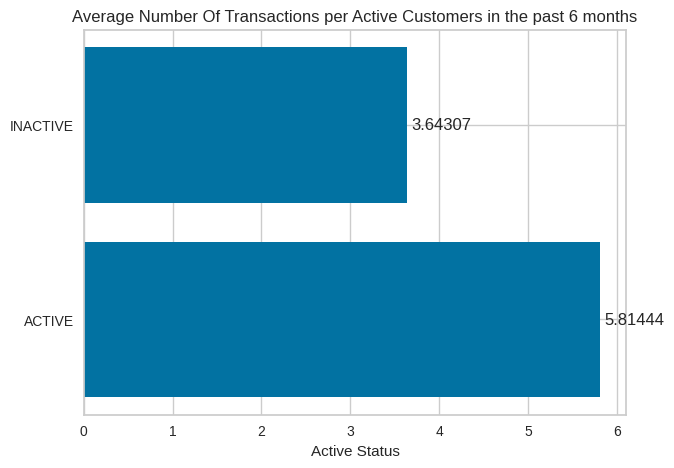

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax1 = ax.barh(ACTIVE_GROUP.index, ACTIVE_GROUP['AVG_TXN_L6M'])
ax.bar_label(ax1, padding=3)
ax.set_title('Average Number Of Transactions per Active Customers in the past 6 months')
ax.set_xlabel('Active Status')

fig.show()

---

* `PROMO SENSITIVE`

In [ ]:
PROMO_SENSIIVE = df_trend.groupby('promo_sensitive').agg({
    'ACCOUNT_ID' : ['count'],
    'TXN_CNT_LTM' : ['mean'],
    'TXN_CNT_L6M' : ['mean']
})

In [ ]:
PROMO_SENSIIVE.columns = ['TOTAL_COUNT_ID','AVG_TXN_LTM','AVG_TXN_L6M']
PROMO_SENSIIVE

,TOTAL_COUNT_ID,AVG_TXN_LTM,AVG_TXN_L6M
promo_sensitive,,,
Not-Sensitive,20520,19.034552,4.590400
Sensitive,87138,20.422651,4.508963


In [ ]:
# PROMO_SENSIIVE = PROMO_SENSIIVE.set_index('promo_sensitive')

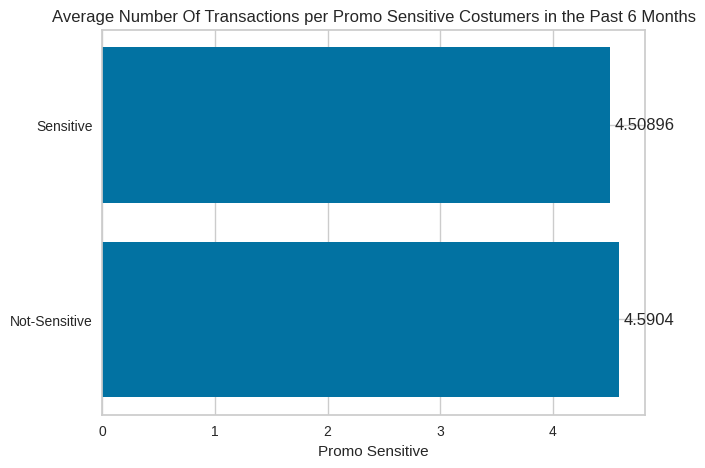

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax1 = ax.barh(PROMO_SENSIIVE.index, PROMO_SENSIIVE['AVG_TXN_L6M'])
ax.bar_label(ax1, padding=3)
ax.set_title('Average Number Of Transactions per Promo Sensitive Costumers in the Past 6 Months')
ax.set_xlabel('Promo Sensitive')

fig.show()

* `ACTIVE_SENSITIVE_GROUP`

In [ ]:
ACTIVE_SENSITIVE_GROUP = df_trend.groupby(['ACTIVE_STATUS','promo_sensitive'] , as_index=False).agg({
    'ACCOUNT_ID' : ['count'],
    'TXN_CNT_LTM' : ['mean'],
    'TXN_CNT_L6M' : ['mean']
})

In [ ]:
ACTIVE_SENSITIVE_GROUP.columns = ['ACTIVE_STATUS','PROMO_SENSITIVE','TOTAL_COUNT_ID','AVG_TXN_LTM','AVG_TXN_L6M']
ACTIVE_SENSITIVE_GROUP

,ACTIVE_STATUS,PROMO_SENSITIVE,TOTAL_COUNT_ID,AVG_TXN_LTM,AVG_TXN_L6M
0,ACTIVE,Not-Sensitive,7174,24.781991,5.477418
1,ACTIVE,Sensitive,36527,26.403044,5.880636
2,INACTIVE,Not-Sensitive,13346,15.945077,4.113592
3,INACTIVE,Sensitive,50611,16.106479,3.518998


In [ ]:
ACTIVE_SENSITIVE_GROUP = ACTIVE_SENSITIVE_GROUP.set_index(['ACTIVE_STATUS','PROMO_SENSITIVE'])

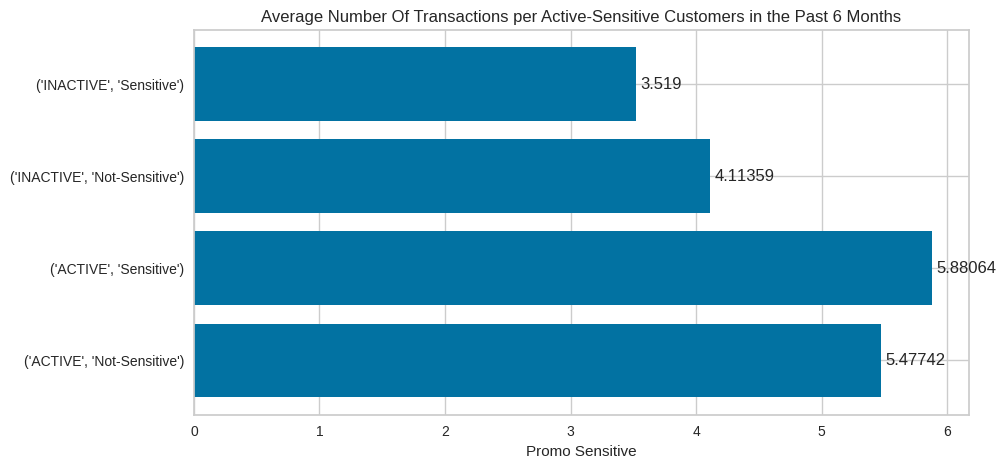

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax1 = ax.barh(range(len(ACTIVE_SENSITIVE_GROUP)), ACTIVE_SENSITIVE_GROUP['AVG_TXN_L6M'])

ax.set_yticks(range(len(ACTIVE_SENSITIVE_GROUP)))
ax.set_yticklabels(ACTIVE_SENSITIVE_GROUP.index)

ax.bar_label(ax1, padding=3)
ax.set_title('Average Number Of Transactions per Active-Sensitive Customers in the Past 6 Months')
ax.set_xlabel('Promo Sensitive')

plt.show()

In [ ]:
# index = pd.MultiIndex.from_product([['Inactive', 'Active'], ['Sensitive', 'Not Sensitive']], names=['Status', 'Promo Sensitive'])
# ACTIVE_SENSITIVE_GROUP = pd.ACTIVE_SENSITIVE_GROUP(data, index=index)

# Warna untuk setiap kategori
# colors = {'''INACTIVE','Sensitive''': 'red', '''INACTIVE','Not-Sensitive''': 'red', '''ACTIVE','Sensitive''': 'green', '''ACTIVE','Not-Sensitive''': 'green'}

# fig, ax = plt.subplots(figsize=(10, 5))

# Plotting dengan multiple index
# for idx, group in ACTIVE_SENSITIVE_GROUP.groupby(level='ACTIVE_STATUS'):
#     for sub_idx, sub_group in group.groupby(level='PROMO_SENSITIVE'):
#         label = f"{idx}-{sub_idx}"
#         ax.barh(label, sub_group['AVG_TXN_L6M'], color=colors[label])
#         ax.text(sub_group['AVG_TXN_L6M'].iloc[0] + 0.5, ax.get_yticks().tolist().index(label), str(sub_group['AVG_TXN_L6M'].iloc[0]), va='center')

# ax.set_title('Average Number Of Transactions per Promo Sensitive Customers in the Past 6 Months')
# ax.set_xlabel('Promo Sensitive')
# ax.set_ylabel('Customer Status - Promo Sensitive')

# plt.show()

### b. is there any difference in transaction behavior and promo sensitivity between high-value and lower-value customers in the past 6 months?

* `CUST_VALUE_GROUP`

In [ ]:
CUST_VALUE_GROUP = df_trend.groupby('CUST_VALUE_GROUP', as_index=False).agg({
    'ACCOUNT_ID' : ['count'],
    'TXN_CNT_LTM' : ['mean'],
    'TXN_CNT_L6M' : ['mean']
})

In [ ]:
CUST_VALUE_GROUP.columns = ['CUST_VALUE_GROUP','TOTAL_COUNT_ID','AVG_TXN_LTM','AVG_TXN_L6M']
CUST_VALUE_GROUP

,CUST_VALUE_GROUP,TOTAL_COUNT_ID,AVG_TXN_LTM,AVG_TXN_L6M
0,A,16389,20.117030,4.225212
1,B,16997,19.421427,4.355651
2,C,17734,19.839856,4.533044
3,D,12001,20.267144,4.593951
4,E,44537,20.551631,4.676920


In [ ]:
CUST_VALUE_GROUP = CUST_VALUE_GROUP.set_index('CUST_VALUE_GROUP')

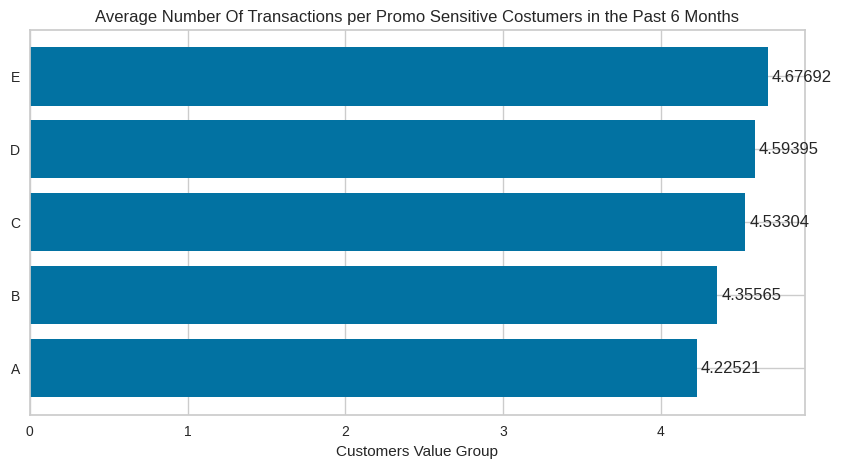

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.barh(CUST_VALUE_GROUP.index, CUST_VALUE_GROUP['AVG_TXN_L6M'])
ax.bar_label(ax1, padding=3)
ax.set_title('Average Number Of Transactions per Promo Sensitive Costumers in the Past 6 Months')
ax.set_xlabel('Customers Value Group')

fig.show()

* `CUST_VALUE_SENSITIVE_GROUP`

In [ ]:
CUST_VALUE_SENSITIVE_GROUP = df_trend.groupby(['CUST_VALUE_GROUP','promo_sensitive'] , as_index=False).agg({
    'ACCOUNT_ID' : ['count'],
    'TXN_CNT_LTM' : ['mean'],
    'TXN_CNT_L6M' : ['mean']
})

In [ ]:
CUST_VALUE_SENSITIVE_GROUP.columns = ['CUST_VALUE_GROUP','PROMO_SENSITIVE','TOTAL_COUNT_ID','AVG_TXN_LTM','AVG_TXN_L6M']
CUST_VALUE_SENSITIVE_GROUP

,CUST_VALUE_GROUP,PROMO_SENSITIVE,TOTAL_COUNT_ID,AVG_TXN_LTM,AVG_TXN_L6M
0,A,Not-Sensitive,2776,19.513329,4.366715
1,A,Sensitive,13613,20.240138,4.196356
2,B,Not-Sensitive,3102,18.220503,4.474855
3,B,Sensitive,13895,19.689529,4.329039
4,C,Not-Sensitive,3435,19.157787,4.527511
5,C,Sensitive,14299,20.003707,4.534373
6,D,Not-Sensitive,2303,18.943118,4.683456
7,D,Sensitive,9698,20.581563,4.572695
8,E,Not-Sensitive,8904,19.144991,4.700584
9,E,Sensitive,35633,20.903124,4.671007


### c. is there a relationship between increasing the number of email and sms messages and inproved sales performance?

In [ ]:
PROMO_CHANNEL = df_trend.groupby('PROMO_CHANNEL', as_index=False).agg({
    'ACCOUNT_ID' : ['count'],
    'TXN_CNT_LTM' : ['mean'],
    'TXN_CNT_L6M' : ['mean']
})

In [ ]:
PROMO_CHANNEL.columns = ['PROMO_CHANNEL','TOTAL_COUNT_ID','AVG_TXN_LTM','AVG_TXN_L6M']
PROMO_CHANNEL

,PROMO_CHANNEL,TOTAL_COUNT_ID,AVG_TXN_LTM,AVG_TXN_L6M
0,email,32359,20.169659,4.513458
1,sms,75299,20.153096,4.529223


In [ ]:
PROMO_CHANNEL = PROMO_CHANNEL.set_index('PROMO_CHANNEL')

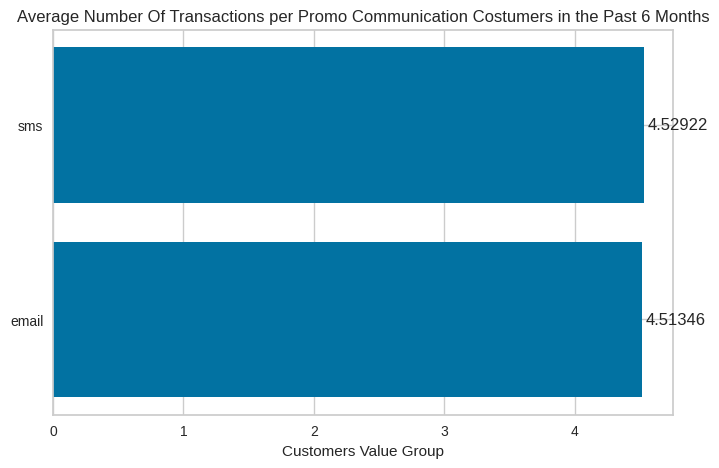

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax1 = ax.barh(PROMO_CHANNEL.index, PROMO_CHANNEL['AVG_TXN_L6M'])
ax.bar_label(ax1, padding=3)
ax.set_title('Average Number Of Transactions per Promo Communication Costumers in the Past 6 Months')
ax.set_xlabel('Customers Value Group')

fig.show()

## backup


In [ ]:
df_ml1 = df_trend.copy()
# df_ml1.to_csv('ML1_data.csv', index=False) #Save to csv
# df_ml1.to_excel('ML1_data_excel.xlsx', index=False)#Save to excel
# sns.histplot(df_mob["MOB"], bins = 10)

# MILESTONE 2

## RFM Clustering

In [ ]:
df_rfm = df_trend.copy()
df_rfm.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,AGE_GROUP,MOB_GROUP,HOME_VALUE_GROUP,PROXY_INCOME_GROUP,PCT_INC_RT_GROUP,ACCOUNT_CREATION_DATE,ACTIVE_STATUS
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1080.0,400.0,47,"(45, 55]","(120.0, 150.0]","(50000.0, 100000.0]","[40000.0, 60000.0)","[20.0, 40.0)",2012-12-24,INACTIVE
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,429.9,280.0,31,"(25, 35]","(90.0, 120.0]","(50000.0, 100000.0]","[20000.0, 40000.0)","[20.0, 40.0)",2014-02-17,INACTIVE
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1053.2,800.0,52,"(45, 55]","(60.0, 90.0]","(0.0, 50000.0]","[0.0, 20000.0)","[0.0, 20.0)",2015-10-10,INACTIVE
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1884.8,1457.4,39,"(35, 45]","(60.0, 90.0]","(50000.0, 100000.0]","[0.0, 20000.0)","[0.0, 20.0)",2016-01-08,ACTIVE
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,490.0,390.0,33,"(25, 35]","(120.0, 150.0]","(0.0, 50000.0]","[40000.0, 60000.0)","[20.0, 40.0)",2012-11-24,ACTIVE


In [ ]:
df_rfm.columns

Index(['ACCOUNT_ID', 'MCC', 'MERCHANT_NAME', 'AVG_TXN_AMT_L6M',
       'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM',
       'TXN_CNT_L6M', 'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM',
       'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'GENDER', 'PROMO_CHANNEL', 'BIRTH_DATE',
       'promo_sensitive', 'TOTAL_AMT_LTM', 'TOTAL_AMT_CS_PROMO_LTM',
       'TOTAL_AMT_L6M', 'TOTAL_AMT_CS_PROMO_L6M', 'AGE', 'AGE_GROUP',
       'MOB_GROUP', 'HOME_VALUE_GROUP', 'PROXY_INCOME_GROUP',
       'PCT_INC_RT_GROUP', 'ACCOUNT_CREATION_DATE', 'ACTIVE_STATUS'],
      dtype='object')

In [ ]:
df_rfm = df_rfm[['ACCOUNT_ID','LAST_TXN_DAY','TXN_CNT_L6M','TOTAL_AMT_L6M']]

In [ ]:
df_rfm = df_rfm.set_index(['ACCOUNT_ID'])
df_rfm.columns = ['recency','frequency','monetary']

df_rfm

,recency,frequency,monetary
ACCOUNT_ID,,,
100000004,15.0,5.0,1080.0
100000008,20.0,3.0,429.9
100000012,16.0,4.0,1053.2
100000014,20.0,8.0,1884.8
100000015,25.0,5.0,490.0
...,...,...,...
101059832,4.0,2.0,200.0
101059843,8.0,3.0,360.0
101059857,19.0,7.0,370.3


In [ ]:
df_rfm.describe(include='all')

,recency,frequency,monetary
count,107658.000000,107658.000000,107658.000000
mean,18.302885,4.524485,526.103206
std,4.149287,2.311293,378.254882
min,2.000000,1.000000,35.000000
25%,16.000000,3.000000,300.000000
50%,18.000000,4.000000,430.000000
75%,21.000000,6.000000,641.300000
max,28.000000,18.000000,8500.000000


In [ ]:
pd.qcut(df_rfm['recency'], q = 4).value_counts().sort_index()

(1.999, 16.0]    28451
(16.0, 18.0]     32807
(18.0, 21.0]     25123
(21.0, 28.0]     21277
Name: recency, dtype: int64

In [ ]:
pd.qcut(df_rfm['frequency'], q = 4).value_counts().sort_index()

(0.999, 3.0]    41657
(3.0, 4.0]      19739
(4.0, 6.0]      26550
(6.0, 18.0]     19712
Name: frequency, dtype: int64

In [ ]:
pd.qcut(df_rfm['monetary'], q = 4).value_counts().sort_index()

(34.999, 300.0]    30384
(300.0, 430.0]     23652
(430.0, 641.3]     26708
(641.3, 8500.0]    26914
Name: monetary, dtype: int64

To simplify the RFM score, let's assign a number of each bins

RECENCY
- 2 - 16 : 4 (the best)
- 16 - 18 : 3
- 18 - 21: 2
- 21 - 28 : 1 (the worst)

FREQUENCY
- 1 - 4 : 1 (the worst)
- 3 - 4 : 2
- 4 - 6 : 3
- 6 - 18 : 4 (the best)

MONETARY
- (34.999, 300.0] : 1 (the worst)
- (300.0, 430.0]  : 2
- (430.0, 641.3] : 3
- (641.3, 8500.0]  : 4 (the best)

In [ ]:
# Create RFM score
df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q = 5, labels = ['5','4','3','2','1'])
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q = 5, duplicates = 'drop', labels = ['1','2','3','4','5'])
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
df_rfm['rfm_score'] = df_rfm['r_score'].astype(str) + df_rfm['f_score'].astype(str) + df_rfm['m_score'].astype(str)
df_rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
ACCOUNT_ID,,,,,,,
100000004,15.0,5.0,1080.0,5,3,5,535
100000008,20.0,3.0,429.9,2,1,3,213
100000012,16.0,4.0,1053.2,5,2,5,525
100000014,20.0,8.0,1884.8,2,5,5,255
100000015,25.0,5.0,490.0,1,3,3,133


In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
print(GSHEET_URL_CSV)
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)
rfm_segments.head()

https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/export?format=csv&gid=884117664


,rfm_score,segment,Activity,Actionable
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,554,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,544,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...


In [ ]:
df_rfm2 = df_rfm.merge(rfm_segments, how='left', on = 'rfm_score')
df_rfm2.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,15.0,5.0,1080.0,5,3,5,535,Customers Needing Attention,"Above average recency, frequency and monetary ...","Make limited time offers, Recommend based on p..."
1,20.0,3.0,429.9,2,1,3,213,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr..."
2,16.0,4.0,1053.2,5,2,5,525,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,20.0,8.0,1884.8,2,5,5,255,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
4,25.0,5.0,490.0,1,3,3,133,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."


In [ ]:
df_rfm2['segment'].value_counts()

Recent Customers               19077
Promising                      15480
Potential Loyalist             14368
At Risk                        12298
Champions                      10865
Hibernating                     9069
Lost                            7051
Can’t Lose Them                 6605
Customers Needing Attention     5249
Loyal Customers                 5160
About To Sleep                  2436
Name: segment, dtype: int64

In [ ]:
df_rfm2['Actionable'].value_counts()

Provide on-boarding support, give them early success, start building relationship.                   19077
Create brand awareness, offer free trials                                                            15480
Offer membership / loyalty program, recommend other products.                                        14368
Send personalized emails to reconnect, offer renewals, provide helpful resources.                    12298
Reward them. Can be early adopters for new products. Will promote your brand.                        10865
Offer other relevant products and special discounts. Recreate brand value.                            9069
Revive interest with reach out campaign, ignore otherwise.                                            7051
Win them back via renewals or newer products, don’t lose them to competition, talk to them.           6605
Make limited time offers, Recommend based on past purchases. Reactivate them.                         5249
Upsell higher value products. Ask for

## K-Means Clustering

In [ ]:
df_kmean = df_trend.copy()
df_kmean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ACCOUNT_ID              107658 non-null  int64         
 1   MCC                     107658 non-null  object        
 2   MERCHANT_NAME           107658 non-null  object        
 3   AVG_TXN_AMT_L6M         107658 non-null  float64       
 4   AVG_TXN_AMT_LTM         107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M   107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM   107658 non-null  float64       
 7   TXN_CNT_L6M             107658 non-null  float64       
 8   TXN_CNT_LTM             107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M       107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM       107658 non-null  float64       
 11  LAST_TXN_DAY            107658 non-null  float64       
 12  CNT_PROMO_L6M           107658

In [ ]:
kmean = df_kmean[['ACCOUNT_ID','AVG_TXN_AMT_L6M','AVG_TXN_AMT_LTM','AVG_PROMO_TXN_AMT_L6M',
'AVG_PROMO_TXN_AMT_LTM','TXN_CNT_L6M','TXN_CNT_LTM','PROMO_TXN_CNT_L6M',
'PROMO_TXN_CNT_LTM','LAST_TXN_DAY','CNT_PROMO_L6M','CNT_PROMO_L12M',
'HOME_VALUE','PROXY_INCOME','PCT_INCOME_RETIREMENT','MOB','TOTAL_AMT_LTM',
'TOTAL_AMT_CS_PROMO_LTM','TOTAL_AMT_L6M','TOTAL_AMT_CS_PROMO_L6M','AGE']]

In [ ]:
kmean = kmean.set_index('ACCOUNT_ID')

In [ ]:
kmean.head()

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE
ACCOUNT_ID,,,,,,,,,,,,,,,,,,,,
100000004,216.0,201.0,200.0,250.0,5.0,21.0,2.0,7.0,15.0,9.0,19.0,90587.0,59785.0,32.0,123.0,4221.0,1750.0,1080.0,400.0,47
100000008,143.3,114.1,140.0,150.0,3.0,22.0,2.0,10.0,20.0,8.0,13.0,65814.0,32597.0,34.0,109.0,2510.2,1500.0,429.9,280.0,31
100000012,263.3,242.7,400.0,290.0,4.0,12.0,2.0,4.0,16.0,12.0,27.0,42583.0,0.0,1.0,89.0,2912.4,1160.0,1053.2,800.0,52
100000014,235.6,210.0,242.9,300.0,8.0,27.0,6.0,13.0,20.0,9.0,18.0,61176.0,0.0,0.0,86.0,5670.0,3900.0,1884.8,1457.4,39
100000015,98.0,77.5,97.5,90.0,5.0,44.0,4.0,21.0,25.0,8.0,18.0,44525.0,42253.0,22.0,124.0,3410.0,1890.0,490.0,390.0,33


In [ ]:
kmean.columns

Index(['AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M',
       'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M', 'TXN_CNT_LTM',
       'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY',
       'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'TOTAL_AMT_LTM',
       'TOTAL_AMT_CS_PROMO_LTM', 'TOTAL_AMT_L6M', 'TOTAL_AMT_CS_PROMO_L6M',
       'AGE'],
      dtype='object')

In [ ]:
kmean[['HOME_VALUE','PROXY_INCOME']] = kmean[['HOME_VALUE','PROXY_INCOME']]/10000 #scaling data, minmax scaling
kmean.head()

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE
ACCOUNT_ID,,,,,,,,,,,,,,,,,,,,
100000004,216.0,201.0,200.0,250.0,5.0,21.0,2.0,7.0,15.0,9.0,19.0,9.0587,5.9785,32.0,123.0,4221.0,1750.0,1080.0,400.0,47
100000008,143.3,114.1,140.0,150.0,3.0,22.0,2.0,10.0,20.0,8.0,13.0,6.5814,3.2597,34.0,109.0,2510.2,1500.0,429.9,280.0,31
100000012,263.3,242.7,400.0,290.0,4.0,12.0,2.0,4.0,16.0,12.0,27.0,4.2583,0.0000,1.0,89.0,2912.4,1160.0,1053.2,800.0,52
100000014,235.6,210.0,242.9,300.0,8.0,27.0,6.0,13.0,20.0,9.0,18.0,6.1176,0.0000,0.0,86.0,5670.0,3900.0,1884.8,1457.4,39
100000015,98.0,77.5,97.5,90.0,5.0,44.0,4.0,21.0,25.0,8.0,18.0,4.4525,4.2253,22.0,124.0,3410.0,1890.0,490.0,390.0,33


In [ ]:
kmean[['TOTAL_AMT_LTM','TOTAL_AMT_CS_PROMO_LTM','TOTAL_AMT_L6M','TOTAL_AMT_CS_PROMO_L6M']] = kmean[['TOTAL_AMT_LTM','TOTAL_AMT_CS_PROMO_LTM','TOTAL_AMT_L6M','TOTAL_AMT_CS_PROMO_L6M']]/1000 #scaling data, minmax scaling
kmean.head()

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE
ACCOUNT_ID,,,,,,,,,,,,,,,,,,,,
100000004,216.0,201.0,200.0,250.0,5.0,21.0,2.0,7.0,15.0,9.0,19.0,9.0587,5.9785,32.0,123.0,4.2210,1.75,1.0800,0.4000,47
100000008,143.3,114.1,140.0,150.0,3.0,22.0,2.0,10.0,20.0,8.0,13.0,6.5814,3.2597,34.0,109.0,2.5102,1.50,0.4299,0.2800,31
100000012,263.3,242.7,400.0,290.0,4.0,12.0,2.0,4.0,16.0,12.0,27.0,4.2583,0.0000,1.0,89.0,2.9124,1.16,1.0532,0.8000,52
100000014,235.6,210.0,242.9,300.0,8.0,27.0,6.0,13.0,20.0,9.0,18.0,6.1176,0.0000,0.0,86.0,5.6700,3.90,1.8848,1.4574,39
100000015,98.0,77.5,97.5,90.0,5.0,44.0,4.0,21.0,25.0,8.0,18.0,4.4525,4.2253,22.0,124.0,3.4100,1.89,0.4900,0.3900,33


In [ ]:
kmean[['AVG_TXN_AMT_L6M','AVG_TXN_AMT_LTM','AVG_PROMO_TXN_AMT_L6M','AVG_PROMO_TXN_AMT_LTM']] = kmean[['AVG_TXN_AMT_L6M','AVG_TXN_AMT_LTM','AVG_PROMO_TXN_AMT_L6M','AVG_PROMO_TXN_AMT_LTM']]/100 #scaling data, minmax scaling
kmean.head()

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE
ACCOUNT_ID,,,,,,,,,,,,,,,,,,,,
100000004,2.160,2.010,2.000,2.5,5.0,21.0,2.0,7.0,15.0,9.0,19.0,9.0587,5.9785,32.0,123.0,4.2210,1.75,1.0800,0.4000,47
100000008,1.433,1.141,1.400,1.5,3.0,22.0,2.0,10.0,20.0,8.0,13.0,6.5814,3.2597,34.0,109.0,2.5102,1.50,0.4299,0.2800,31
100000012,2.633,2.427,4.000,2.9,4.0,12.0,2.0,4.0,16.0,12.0,27.0,4.2583,0.0000,1.0,89.0,2.9124,1.16,1.0532,0.8000,52
100000014,2.356,2.100,2.429,3.0,8.0,27.0,6.0,13.0,20.0,9.0,18.0,6.1176,0.0000,0.0,86.0,5.6700,3.90,1.8848,1.4574,39
100000015,0.980,0.775,0.975,0.9,5.0,44.0,4.0,21.0,25.0,8.0,18.0,4.4525,4.2253,22.0,124.0,3.4100,1.89,0.4900,0.3900,33


###clustering

###ELBOW Method

In [ ]:
distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 42)
  kmeanModel.fit(kmean)
  distortions.append(kmeanModel.inertia_)

distortions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[114307038.71320193,
 59824410.405746415,
 51102677.50370592,
 46671523.439621516,
 43056932.390852034,
 39848173.098886475,
 37251494.938511625,
 35465219.249934345,
 34013098.85227514,
 32626424.544280212]

<Figure size 1600x800 with 0 Axes>

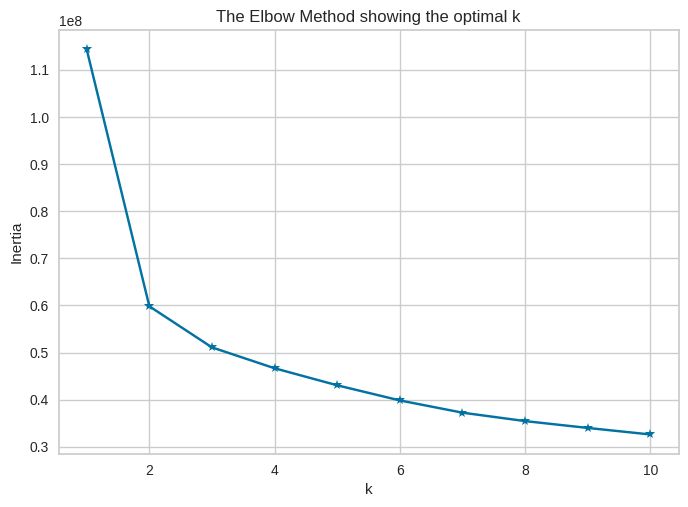

In [ ]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### silhouette Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.25335584810571526

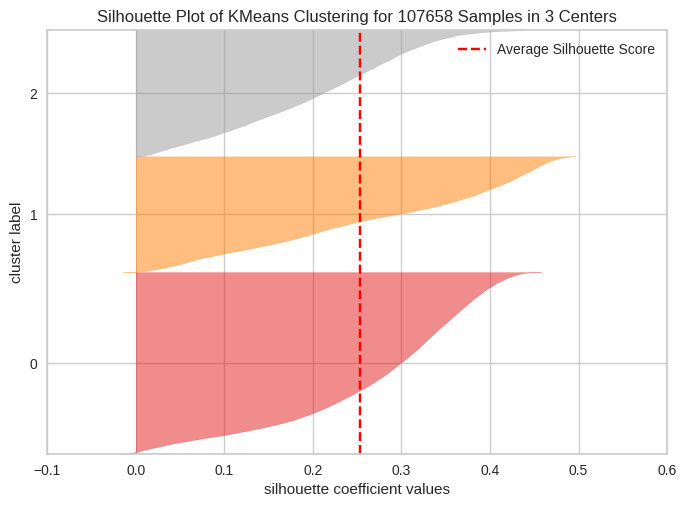

In [ ]:
cluster_model = KMeans(n_clusters = 3, random_state = 42)
cluster_model.fit(kmean)

sil = SilhouetteVisualizer(cluster_model, is_fitted = True)
sil.fit(kmean)
sil.finalize()
sil.silhouette_score_

In [ ]:
# K = range(2,4)
# max_K = max(K)
# fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

# for n_clusters in K:
#   kmeanModel = KMeans(n_clusters)

#   q, mod = divmod(n_clusters,2)
#   sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
#   sil.fit(kmean)
#   sil.finalize()
#   print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

use 3 clustering

In [ ]:
cluster_model = KMeans(n_clusters = 3, random_state = 28,n_init='auto')
cluster_model

KMeans(n_clusters=3, n_init='auto', random_state=28)

In [ ]:
cluster_model.fit(kmean)

KMeans(n_clusters=3, n_init='auto', random_state=28)

In [ ]:
kmean2 = kmean.copy()
kmean2['cluster'] = cluster_model.labels_
kmean2

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,...,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,TOTAL_AMT_LTM,TOTAL_AMT_CS_PROMO_LTM,TOTAL_AMT_L6M,TOTAL_AMT_CS_PROMO_L6M,AGE,cluster
ACCOUNT_ID,,,,,,,,,,,,,,,,,,,,,
100000004,2.160,2.010,2.000,2.5,5.0,21.0,2.0,7.0,15.0,9.0,...,9.0587,5.9785,32.0,123.0,4.2210,1.75,1.0800,0.4000,47,1
100000008,1.433,1.141,1.400,1.5,3.0,22.0,2.0,10.0,20.0,8.0,...,6.5814,3.2597,34.0,109.0,2.5102,1.50,0.4299,0.2800,31,0
100000012,2.633,2.427,4.000,2.9,4.0,12.0,2.0,4.0,16.0,12.0,...,4.2583,0.0000,1.0,89.0,2.9124,1.16,1.0532,0.8000,52,0
100000014,2.356,2.100,2.429,3.0,8.0,27.0,6.0,13.0,20.0,9.0,...,6.1176,0.0000,0.0,86.0,5.6700,3.90,1.8848,1.4574,39,0
100000015,0.980,0.775,0.975,0.9,5.0,44.0,4.0,21.0,25.0,8.0,...,4.4525,4.2253,22.0,124.0,3.4100,1.89,0.4900,0.3900,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059832,1.000,0.842,1.000,1.0,2.0,12.0,2.0,5.0,4.0,6.0,...,4.7708,0.0000,48.0,124.0,1.0104,0.50,0.2000,0.2000,43,1
101059843,1.200,1.134,1.200,2.0,3.0,22.0,1.0,5.0,8.0,4.0,...,2.7087,3.5533,33.0,68.0,2.4948,1.00,0.3600,0.1200,29,2
101059857,0.529,0.368,0.467,0.7,7.0,28.0,3.0,12.0,19.0,5.0,...,2.6302,0.0000,27.0,125.0,1.0304,0.84,0.3703,0.1401,42,1


In [ ]:
kmean2.cluster.value_counts().sort_index()

0    31660
1    46594
2    29404
Name: cluster, dtype: int64

In [ ]:
# sns.pairplot(kmean2,hue='cluster')

In [ ]:
kmean2.groupby('cluster').count()[['AGE']].T

cluster,0,1,2
AGE,31660,46594,29404


In [ ]:
kmean2.groupby('cluster').mean().T

cluster,0,1,2
AVG_TXN_AMT_L6M,1.325094,1.249057,1.236433
AVG_TXN_AMT_LTM,1.134663,1.006872,1.093798
AVG_PROMO_TXN_AMT_L6M,1.314432,1.241586,1.219513
AVG_PROMO_TXN_AMT_LTM,1.245681,1.198571,1.146596
TXN_CNT_L6M,4.134586,4.220221,5.426439
TXN_CNT_LTM,17.899274,24.370842,15.914569
PROMO_TXN_CNT_L6M,2.551421,2.648131,3.397565
PROMO_TXN_CNT_LTM,9.188945,12.872151,7.663685
LAST_TXN_DAY,18.255938,18.377452,18.235274
CNT_PROMO_L6M,5.730006,5.603876,5.962352


In [ ]:
kmean2.groupby('cluster').sum().T

cluster,0,1,2
AVG_TXN_AMT_L6M,4.195249e+04,5.819854e+04,3.635607e+04
AVG_TXN_AMT_LTM,3.592342e+04,4.691420e+04,3.216204e+04
AVG_PROMO_TXN_AMT_L6M,4.161492e+04,5.785047e+04,3.585856e+04
AVG_PROMO_TXN_AMT_LTM,3.943825e+04,5.584624e+04,3.371451e+04
TXN_CNT_L6M,1.309010e+05,1.966370e+05,1.595590e+05
TXN_CNT_LTM,5.666910e+05,1.135535e+06,4.679520e+05
PROMO_TXN_CNT_L6M,8.077800e+04,1.233870e+05,9.990200e+04
PROMO_TXN_CNT_LTM,2.909220e+05,5.997650e+05,2.253430e+05
LAST_TXN_DAY,5.779830e+05,8.562790e+05,5.361900e+05
CNT_PROMO_L6M,1.814120e+05,2.611070e+05,1.753170e+05


### Identify the segment Clustering

* RFM

In [ ]:
df_rfm2['segment'].value_counts()

Recent Customers               19077
Promising                      15480
Potential Loyalist             14368
At Risk                        12298
Champions                      10865
Hibernating                     9069
Lost                            7051
Can’t Lose Them                 6605
Customers Needing Attention     5249
Loyal Customers                 5160
About To Sleep                  2436
Name: segment, dtype: int64

In [ ]:
df_rfm2['Actionable'].value_counts()

Provide on-boarding support, give them early success, start building relationship.                   19077
Create brand awareness, offer free trials                                                            15480
Offer membership / loyalty program, recommend other products.                                        14368
Send personalized emails to reconnect, offer renewals, provide helpful resources.                    12298
Reward them. Can be early adopters for new products. Will promote your brand.                        10865
Offer other relevant products and special discounts. Recreate brand value.                            9069
Revive interest with reach out campaign, ignore otherwise.                                            7051
Win them back via renewals or newer products, don’t lose them to competition, talk to them.           6605
Make limited time offers, Recommend based on past purchases. Reactivate them.                         5249
Upsell higher value products. Ask for

* K-Means

In [ ]:
kmean2.groupby('cluster').mean().T

cluster,0,1,2
AVG_TXN_AMT_L6M,1.325094,1.249057,1.236433
AVG_TXN_AMT_LTM,1.134663,1.006872,1.093798
AVG_PROMO_TXN_AMT_L6M,1.314432,1.241586,1.219513
AVG_PROMO_TXN_AMT_LTM,1.245681,1.198571,1.146596
TXN_CNT_L6M,4.134586,4.220221,5.426439
TXN_CNT_LTM,17.899274,24.370842,15.914569
PROMO_TXN_CNT_L6M,2.551421,2.648131,3.397565
PROMO_TXN_CNT_LTM,9.188945,12.872151,7.663685
LAST_TXN_DAY,18.255938,18.377452,18.235274
CNT_PROMO_L6M,5.730006,5.603876,5.962352


#### INSIGHT

* Cluster 2:  The Old man

This cluster represents customers with moderate shopping behavior. This customer makes an average transaction without being too sensitive to promotions. They are relatively stable customers who make regular purchases without the need for major promotions.

* Cluster 1: The Potential

This cluster represents customers with low spending and high sensitivity to promotions. This customer did not make any significant transactions but was very responsive to promotions. They may be occasional or potential customers who need additional incentives or promotions to increase their spending.

* Cluster 0: The Loyal

This cluster represents customers with a high average spend. These customers make significant transactions and are less sensitive to promotions. They are the most valuable customers who consistently make high-value purchases, regardless of the promotion.

### Recomendation

* Cluster 2:The Old man

Offer occasional promotions or giveaways to maintain the loyalty of this segment and keep them engaged. Identify opportunities to upsell or cross-sell products and services to increase their transaction volume.

* Cluster 1:  The Potential

Focus on targeted promotions and offers to attract these potential customers and encourage them to make more purchases. Implement strategies to increase engagement with this segment and turn them into more regular and loyal customers.

* Cluster 0: The Loyal

Provide personalized and exclusive offers to reward and retain these valued customers. Strengthen customer loyalty programs to keep them engaged and satisfied with their purchases.